Columns in dataset: Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Model Performance:
Mean Absolute Error: 1.4607567168117606
Mean Squared Error: 3.1740973539761046
R-squared Score: 0.899438024100912


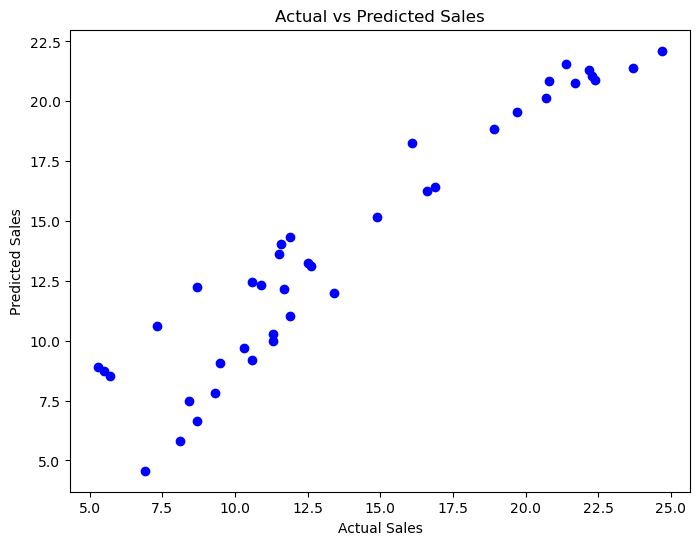


Enter advertising budget for prediction:


TV Advertising Budget:  10
Radio Advertising Budget:  20
Newspaper Advertising Budget:  30



Predicted Sales: 7.29


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# File Path
file_path = r"C:/Users/Manasvi/OneDrive/Desktop/Advertising.csv"

def load_data(file_path):
    """Load dataset from a CSV file."""
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df):
    """Preprocess the dataset: Handle missing values and split data."""
    
    # Display column names
    print("Columns in dataset:", df.columns)
    
    # Drop irrelevant columns (if any)
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
    
    # Define features and target variable
    X = df[['TV', 'Radio', 'Newspaper']]
    y = df['Sales']
    
    return X, y

def train_model(X, y):
    """Train a Linear Regression model and evaluate its performance."""
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Model evaluation
    print("\nModel Performance:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared Score:", r2_score(y_test, y_pred))

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color="blue")
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual vs Predicted Sales")
    plt.show()

    return model

def predict_sales(model):
    """Predict sales based on user input."""
    print("\nEnter advertising budget for prediction:")
    tv = float(input("TV Advertising Budget: "))
    radio = float(input("Radio Advertising Budget: "))
    newspaper = float(input("Newspaper Advertising Budget: "))

    predicted_sales = model.predict([[tv, radio, newspaper]])
    print(f"\nPredicted Sales: {predicted_sales[0]:.2f}")

def main():
    """Main function to run the sales prediction project."""
    
    # Load data
    df = load_data(file_path)
    
    # Preprocess data
    X, y = preprocess_data(df)
    
    # Train model
    model = train_model(X, y)
    
    # Predict sales based on user input
    predict_sales(model)

if __name__ == "__main__":
    main()
